# Visualizing AQI during the 2017 Thomas Fire in Santa Barbara County

*Author: Haylee Oyler*

[Link to github repo](https://github.com/haylee360/thomas-fire-analysis)

## About

### Purpose 
This analysis explores the change in air quality in Santa Barbara county during the 2017 Thomas Fire. The Thomas Fire was one of the regions largest fires to date, burning over 280,000 acres in Ventura and Santa Barbara counties in December 2017. It caused widespread ecological damage, displaced communities, and left lasting environmental impacts. Additionally, wildfire smoke is a strong trigger for respiratory diseases such as asthma. One way to measure wildfire's environmental health effects is through air quality.

The air quality index (AQI) is a measure of how clean or polluted the air is and what associated health effects might be a concern [cite](https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information). It is a scale that ranges from 0-500 with 0-50 being good, 151-200 being unhealth, and 301-500 being hazardous. 

This analysis will using AQI data to the explore the Thomas Fire's effects on air quality and environmental health in Santa Barbara County. 

### Highlights
- Import AQI data using `pandas`
- Explore and clean AQI data using `pandas`
- Filter AQI data to Santa Barbara county during the Thomas Fire using `pandas`
- Calculate a rolling 5 day average AQI using `pandas`
- Visualize the AQI over time during the Thomas Fire using `matplotlib`

### About the Data
This analysis uses data from the [Air Quality Index Daily Values Report](https://www.epa.gov/outdoor-air-quality-data/air-quality-index-daily-values-report) which provides daily AQI values for a specified year and location. We're working with two datasets `daily_aqi_by_county_2017` and `daily_aqi_by_county_2018`. These contain daily aqi values for U.S. counties in 2017 and 2018 respectively. The Thomas Fire occurred in December of 2017, so we've selected data before and after the fire to see a clear picture of its effect on air quality. 

### References
- [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) from [US Environmental Protection Agency](https://www.epa.gov).

  - US Environmental Protection Agency. Air Quality System Data Mart AirNow available via https://www.epa.gov/outdoor-air-quality-data. Accessed October 17 2024.

#### Acknowledgements
All materials were created by [Carmen Galaz-Garcia](https://github.com/carmengg) for [EDS-220: Working with Environmental Data](https://meds-eds-220.github.io/MEDS-eds-220-course/).

### Import data and explore

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read in AQI data for both years
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip', 
                    compression = 'zip')

aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip', 
                    compression = 'zip')

In [2]:
# View the first five rows of aqi 2017
aqi_17.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,28,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,29,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,25,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,40,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,22,Good,PM2.5,01-003-0010,1


In [3]:
# View the first five rows of aqi 2018
aqi_18.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2018-01-02,42,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2018-01-05,45,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2018-01-08,20,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2018-01-11,25,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2018-01-14,33,Good,PM2.5,01-003-0010,1


In [4]:
# View the info of both data frames
print(aqi_17.info())
print(aqi_18.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326801 entries, 0 to 326800
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State Name                 326801 non-null  object
 1   county Name                326801 non-null  object
 2   State Code                 326801 non-null  int64 
 3   County Code                326801 non-null  int64 
 4   Date                       326801 non-null  object
 5   AQI                        326801 non-null  int64 
 6   Category                   326801 non-null  object
 7   Defining Parameter         326801 non-null  object
 8   Defining Site              326801 non-null  object
 9   Number of Sites Reporting  326801 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 24.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327541 entries, 0 to 327540
Data columns (total 10 columns):
 #   Column                     Non-Null Count   D

DESCRIBE DATA HERE

### Clean the AQI data
Currently, our AQI data is housed in two separate data frames. We will join them together using the `pandas` function `pd.concat()` and save them as one data frame named `aqi`.

NOTE: When we concatenate data frames without any extra parameters specified in `pd.concat()`, the indices are simply stacked on top of one another. Therefore, the resuling index values of `aqi` will not match the length of the new data frame. 

In [5]:
# Bind 2017 and 2018 AQI data together
aqi = pd.concat([aqi_17, aqi_18])
aqi

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,28,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,29,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,25,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,40,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,22,Good,PM2.5,01-003-0010,1
...,...,...,...,...,...,...,...,...,...,...
327536,Wyoming,Weston,56,45,2018-12-27,36,Good,Ozone,56-045-0003,1
327537,Wyoming,Weston,56,45,2018-12-28,35,Good,Ozone,56-045-0003,1
327538,Wyoming,Weston,56,45,2018-12-29,35,Good,Ozone,56-045-0003,1
327539,Wyoming,Weston,56,45,2018-12-30,31,Good,Ozone,56-045-0003,1


To address our confusing index, we will change the index of our data frame to the date column.

First, we will ensure that our `Date` column is a `pandas` `datetime` object. Then, we will set our index to the `Date` column.

In [ ]:
# Convert date to a datetime object
aqi.Date = pd.to_datetime(aqi.Date)

# Set the index to our datetime to make visualizing easier later on
aqi = aqi.set_index('Date')
aqi.head(3)

,State Name,county Name,State Code,County Code,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
Date,,,,,,,,,
2017-01-01,Alabama,Baldwin,1,3,28,Good,PM2.5,01-003-0010,1
2017-01-04,Alabama,Baldwin,1,3,29,Good,PM2.5,01-003-0010,1
2017-01-10,Alabama,Baldwin,1,3,25,Good,PM2.5,01-003-0010,1
2017-01-13,Alabama,Baldwin,1,3,40,Good,PM2.5,01-003-0010,1
2017-01-16,Alabama,Baldwin,1,3,22,Good,PM2.5,01-003-0010,1
...,...,...,...,...,...,...,...,...,...
2018-12-27,Wyoming,Weston,56,45,36,Good,Ozone,56-045-0003,1
2018-12-28,Wyoming,Weston,56,45,35,Good,Ozone,56-045-0003,1
2018-12-29,Wyoming,Weston,56,45,35,Good,Ozone,56-045-0003,1


Next, we will clean the column names of our new data frame. We will make all the column names lower snake case via the operations below. Here is a step-by-step of what the functions do:

- `aqi.columns = (aqi.columns` selects the columns from the `aqi` data frame and reassigns them to the original data frame
- ` .str.lower()` uses the string operator to make all the letters lower case
- `.str.replace(' ','_')` converts the output of the lower case columns to a string and replaces all spaces with an underscore
- `)` closes the method chaining 
- `print(aqi.columns, '\n')` lets us view the output of our modified column names 

In [7]:
# Initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n')

# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_')
                )
print(aqi.columns, '\n')

Index(['State Name', 'county Name', 'State Code', 'County Code', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object') 

Index(['state_name', 'county_name', 'state_code', 'county_code', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object') 



### Filter AQI data

In [ ]:
# Filter data to Santa Barbara county 
aqi_sb = aqi[aqi['county_name'] == 'Santa Barbara']

# Drop the columns we're not interested in working with
aqi_sb = aqi_sb.drop(['state_name', 'county_name', 'state_code', 'county_code'], axis=1)
aqi_sb.head(3)

,date,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
28648,2017-01-01,39,Good,Ozone,06-083-4003,12
28649,2017-01-02,39,Good,PM2.5,06-083-2011,11
28650,2017-01-03,71,Moderate,PM10,06-083-4003,12
28651,2017-01-04,34,Good,Ozone,06-083-4003,13
28652,2017-01-05,37,Good,Ozone,06-083-4003,12
...,...,...,...,...,...,...
29128,2018-12-27,37,Good,Ozone,06-083-1025,11
29129,2018-12-28,39,Good,Ozone,06-083-1021,12
29130,2018-12-29,39,Good,Ozone,06-083-1021,12
29131,2018-12-30,41,Good,PM2.5,06-083-1008,12


### AQI rolling average
In the next cell we will calculate an average over a [rolling window](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html) using the `rolling()`method for `pandas.Series`:

- `rolling()` is a lazy method, so we need to specify what we want to calculate over each window before it does something. 
- in this example we use the aggregator function `mean()` to calculate the average over each window
- the parameter '5D' indicates we want the window for our rolling average to be 5 days. 
- we get a `pandas.Series` as ouput

In [22]:
# Calculate AQI rolling average over 5 days
rolling_average = aqi_sb['aqi'].rolling(window='5D').mean()

In [23]:
# Append our rolling average to our original data frame
aqi_sb['five_day_average'] = rolling_average

### Plot AQI during the 2017 Thomas Fire in Santa Barbara County

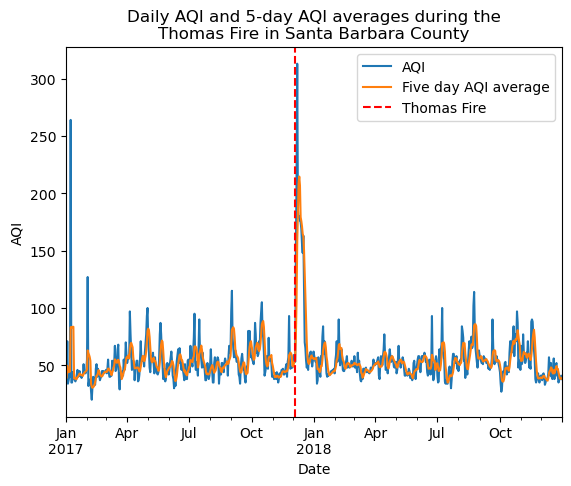

In [ ]:
# Initialize an empty figure (fig) and axis (ax)
fig, ax = plt.subplots()

# Visualize air quality during the Thomas Fire
aqi_sb.aqi.plot(ax=ax, label = 'AQI') # daily aqi
aqi_sb.five_day_average.plot(ax=ax, label = "Five day AQI average") # five day average aqi

# Show the date of the Thomas fire
plt.axvline(x = '2017-12-04', 
            color = 'red', 
            linestyle = 'dashed', 
            label = "Thomas Fire")

# Customize the plot
ax.set_title('Daily AQI and 5-day AQI averages during the\nThomas Fire in Santa Barbara County')
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
ax.legend()

# Display the figure
plt.show()